## We are using Airbnb New York CIty data to understand the pricing of airbnb and reviews and understand how these variables are connected.

### In this note book you can see, 
#### 1.Libraries import
#### 2. Cleaning and exploration of listings and review data and merging them.
#### 3. Creating new columns for further analysis.
#### 4. Geographical visualization


## 1.Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import folium
import json

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\S Keerthana\Desktop\Career Foundry\Achivement 6\02 Data'

## Listing data

In [4]:
#Importing llisting data
df=pd.read_csv(os.path.join(path,'Original Data','AB_NYC_2019.csv'),index_col=False)

In [5]:
df.shape

(48895, 16)

In [6]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Creating new data frame with only required columns

In [9]:
df_data = df[['id', 'host_id','neighbourhood_group', 'neighbourhood','latitude', 'longitude',
              'room_type','price','reviews_per_month','availability_365']]

In [10]:
df_data.head()

id  host_id neighbourhood_group neighbourhood  latitude  longitude  \
0  2539     2787            Brooklyn    Kensington  40.64749  -73.97237   
1  2595     2845           Manhattan       Midtown  40.75362  -73.98377   
2  3647     4632           Manhattan        Harlem  40.80902  -73.94190   
3  3831     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4  5022     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  reviews_per_month  availability_365  
0     Private room    149               0.21               365  
1  Entire home/apt    225               0.38               355  
2     Private room    150                NaN               365  
3  Entire home/apt     89               4.64               194  
4  Entire home/apt     80               0.10                 0

## Dropping and Renaming columns

In [11]:
#changing Listing_id column to string as ita representing ID and not interger
df_data['id']=df_data['id'].astype('str')

C:\Users\S Keerthana\AppData\Local\Temp\ipykernel_2468\1969450478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['id']=df_data['id'].astype('str')


In [12]:
#changing Listing_id column to string as ita representing ID and not interger
df_data['host_id']=df_data['host_id'].astype('str')

C:\Users\S Keerthana\AppData\Local\Temp\ipykernel_2468\3833218075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['host_id']=df_data['host_id'].astype('str')


In [13]:
df_data.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'reviews_per_month',
       'availability_365'],
      dtype='object')

In [14]:
df_data.shape

(48895, 10)

In [15]:
#renaming
    
df_data.rename(columns={'id':'Listing_id','host_id':'Host_id','room_type':'Room_type','price':'Price_list','reviews_per_month':'Rating','availability_365':'Availability_365'},inplace=True)


C:\Users\S Keerthana\AppData\Local\Temp\ipykernel_2468\809299817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.rename(columns={'id':'Listing_id','host_id':'Host_id','room_type':'Room_type','price':'Price_list','reviews_per_month':'Rating','availability_365':'Availability_365'},inplace=True)


In [16]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Listing_id           48895 non-null  object 
 1   Host_id              48895 non-null  object 
 2   neighbourhood_group  48895 non-null  object 
 3   neighbourhood        48895 non-null  object 
 4   latitude             48895 non-null  float64
 5   longitude            48895 non-null  float64
 6   Room_type            48895 non-null  object 
 7   Price_list           48895 non-null  int64  
 8   Rating               38843 non-null  float64
 9   Availability_365     48895 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 3.7+ MB


## Missing value check

In [17]:
df_data.isnull().sum()

Listing_id                 0
Host_id                    0
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
Room_type                  0
Price_list                 0
Rating                 10052
Availability_365           0
dtype: int64

In [18]:
#there are 10052 NUL ratings. we can consider that they were never reviewed and hence will be rating as 0

df_data['Rating'].fillna(0, inplace=True)

C:\Users\S Keerthana\AppData\Local\Temp\ipykernel_2468\1266474582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Rating'].fillna(0, inplace=True)


In [19]:
#verifying NULL again

df_data.isnull().sum()

Listing_id             0
Host_id                0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
Room_type              0
Price_list             0
Rating                 0
Availability_365       0
dtype: int64

## Mixed datatype

In [20]:
#mixed data columns
for col in df_data.columns.tolist():
  weird = (df_data[[col]].applymap(type) != df_data[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_data[weird]) > 0:
    print (col)

No Mixed data type columns!good!

## Duplicates check

In [21]:
df_data_dups = df_data[df_data.duplicated()]

In [22]:
df_data_dups

Empty DataFrame
Columns: [Listing_id, Host_id, neighbourhood_group, neighbourhood, latitude, longitude, Room_type, Price_list, Rating, Availability_365]
Index: []

No Duplcates! great!Now We have all the data required and cleaned.

In [23]:
df_data.shape

(48895, 10)

In [24]:
df_data.head()

Listing_id Host_id neighbourhood_group neighbourhood  latitude  longitude  \
0       2539    2787            Brooklyn    Kensington  40.64749  -73.97237   
1       2595    2845           Manhattan       Midtown  40.75362  -73.98377   
2       3647    4632           Manhattan        Harlem  40.80902  -73.94190   
3       3831    4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4       5022    7192           Manhattan   East Harlem  40.79851  -73.94399   

         Room_type  Price_list  Rating  Availability_365  
0     Private room         149    0.21               365  
1  Entire home/apt         225    0.38               355  
2     Private room         150    0.00               365  
3  Entire home/apt          89    4.64               194  
4  Entire home/apt          80    0.10                 0

## Exploration

In [25]:
#fiding unique values

df_data['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [26]:
df_data['Availability_365'].value_counts(dropna=False)

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: Availability_365, Length: 366, dtype: int64

In [27]:
df_data['Price_list'].value_counts(dropna=False)

100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: Price_list, Length: 674, dtype: int64

In [28]:
df_data.describe()

latitude     longitude    Price_list        Rating  \
count  48895.000000  48895.000000  48895.000000  48895.000000   
mean      40.728949    -73.952170    152.720687      1.090910   
std        0.054530      0.046157    240.154170      1.597283   
min       40.499790    -74.244420      0.000000      0.000000   
25%       40.690100    -73.983070     69.000000      0.040000   
50%       40.723070    -73.955680    106.000000      0.370000   
75%       40.763115    -73.936275    175.000000      1.580000   
max       40.913060    -73.712990  10000.000000     58.500000   

       Availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

In [29]:
#Changing datatype

df_data['Price_list']=df_data['Price_list'].astype('float64')

C:\Users\S Keerthana\AppData\Local\Temp\ipykernel_2468\61213895.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Price_list']=df_data['Price_list'].astype('float64')


In [30]:
#final data

df_data.head()

Listing_id Host_id neighbourhood_group neighbourhood  latitude  longitude  \
0       2539    2787            Brooklyn    Kensington  40.64749  -73.97237   
1       2595    2845           Manhattan       Midtown  40.75362  -73.98377   
2       3647    4632           Manhattan        Harlem  40.80902  -73.94190   
3       3831    4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4       5022    7192           Manhattan   East Harlem  40.79851  -73.94399   

         Room_type  Price_list  Rating  Availability_365  
0     Private room       149.0    0.21               365  
1  Entire home/apt       225.0    0.38               355  
2     Private room       150.0    0.00               365  
3  Entire home/apt        89.0    4.64               194  
4  Entire home/apt        80.0    0.10                 0

## Creating additional flags

There are lot of famous places in New York City like Times Square,Brooklyn Bridge, Statue of Liberty etc. As considering distance from all of the Iconic places would be difficult, I am going to consider 3 variables. 
1. Distance from Grand Central Terminal(lat: 40.752778 , lon :-73.977222)
2. Distance from Airport(lat:40.639722 , lon: -73.778889)
3. Distance from  Statue of Liberty as it is away from center(compared to other must visti places) (lat:40.689167 ,lon:-74.044444) 
I will be using latitude and longitude of airbnb house with these 3 places.
Note : This will be approximate distance using geopy library in python

In [31]:
df_data['location']= list(zip(df_data['latitude'], df_data['longitude']))

C:\Users\S Keerthana\AppData\Local\Temp\ipykernel_2468\4215770026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['location']= list(zip(df_data['latitude'], df_data['longitude']))


In [32]:
df_data.head()

Listing_id Host_id neighbourhood_group neighbourhood  latitude  longitude  \
0       2539    2787            Brooklyn    Kensington  40.64749  -73.97237   
1       2595    2845           Manhattan       Midtown  40.75362  -73.98377   
2       3647    4632           Manhattan        Harlem  40.80902  -73.94190   
3       3831    4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4       5022    7192           Manhattan   East Harlem  40.79851  -73.94399   

         Room_type  Price_list  Rating  Availability_365  \
0     Private room       149.0    0.21               365   
1  Entire home/apt       225.0    0.38               355   
2     Private room       150.0    0.00               365   
3  Entire home/apt        89.0    4.64               194   
4  Entire home/apt        80.0    0.10                 0   

                location  
0  (40.64749, -73.97237)  
1  (40.75362, -73.98377)  
2   (40.80902, -73.9419)  
3  (40.68514, -73.95976)  
4  (40.79851, -73.94399)

In [33]:
#finding distance between Centrall station and property
import geopy.distance

df_data['D.Train'] = df_data.apply(
    lambda row: geopy.distance.distance((row.latitude, row.longitude), (40.752778, -73.977222)).km,
    axis=1
)

C:\Users\S Keerthana\AppData\Local\Temp\ipykernel_2468\4034982833.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['D.Train'] = df_data.apply(


In [34]:
df_data.head()

Listing_id Host_id neighbourhood_group neighbourhood  latitude  longitude  \
0       2539    2787            Brooklyn    Kensington  40.64749  -73.97237   
1       2595    2845           Manhattan       Midtown  40.75362  -73.98377   
2       3647    4632           Manhattan        Harlem  40.80902  -73.94190   
3       3831    4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4       5022    7192           Manhattan   East Harlem  40.79851  -73.94399   

         Room_type  Price_list  Rating  Availability_365  \
0     Private room       149.0    0.21               365   
1  Entire home/apt       225.0    0.38               355   
2     Private room       150.0    0.00               365   
3  Entire home/apt        89.0    4.64               194   
4  Entire home/apt        80.0    0.10                 0   

                location    D.Train  
0  (40.64749, -73.97237)  11.699223  
1  (40.75362, -73.98377)   0.560817  
2   (40.80902, -73.9419)   6.920867  
3  (40.68514, -73.95976)   7.654630  
4  (40.79851, -73.94399)   5.801883

In [35]:
#finding distance between Airport  and property

df_data['D.airport'] = df_data.apply(
    lambda row: geopy.distance.distance((row.latitude, row.longitude), (40.639722 ,-73.778889)).km,
    axis=1
)

C:\Users\S Keerthana\AppData\Local\Temp\ipykernel_2468\942474451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['D.airport'] = df_data.apply(


In [36]:
df_data.head()

Listing_id Host_id neighbourhood_group neighbourhood  latitude  longitude  \
0       2539    2787            Brooklyn    Kensington  40.64749  -73.97237   
1       2595    2845           Manhattan       Midtown  40.75362  -73.98377   
2       3647    4632           Manhattan        Harlem  40.80902  -73.94190   
3       3831    4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4       5022    7192           Manhattan   East Harlem  40.79851  -73.94399   

         Room_type  Price_list  Rating  Availability_365  \
0     Private room       149.0    0.21               365   
1  Entire home/apt       225.0    0.38               355   
2     Private room       150.0    0.00               365   
3  Entire home/apt        89.0    4.64               194   
4  Entire home/apt        80.0    0.10                 0   

                location    D.Train  D.airport  
0  (40.64749, -73.97237)  11.699223  16.388641  
1  (40.75362, -73.98377)   0.560817  21.443784  
2   (40.80902, -73.9419)   6.920867  23.304873  
3  (40.68514, -73.95976)   7.654630  16.105092  
4  (40.79851, -73.94399)   5.801883  22.483763

In [37]:
#finding distance between Staue of Liberty  and property

df_data['D.Statue_of_liberty'] = df_data.apply(
    lambda row: geopy.distance.distance((row.latitude, row.longitude), (40.689167 ,-74.044444)).km,
    axis=1
)

C:\Users\S Keerthana\AppData\Local\Temp\ipykernel_2468\2562043309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['D.Statue_of_liberty'] = df_data.apply(


In [38]:
df_data.head()

Listing_id Host_id neighbourhood_group neighbourhood  latitude  longitude  \
0       2539    2787            Brooklyn    Kensington  40.64749  -73.97237   
1       2595    2845           Manhattan       Midtown  40.75362  -73.98377   
2       3647    4632           Manhattan        Harlem  40.80902  -73.94190   
3       3831    4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4       5022    7192           Manhattan   East Harlem  40.79851  -73.94399   

         Room_type  Price_list  Rating  Availability_365  \
0     Private room       149.0    0.21               365   
1  Entire home/apt       225.0    0.38               355   
2     Private room       150.0    0.00               365   
3  Entire home/apt        89.0    4.64               194   
4  Entire home/apt        80.0    0.10                 0   

                location    D.Train  D.airport  D.Statue_of_liberty  
0  (40.64749, -73.97237)  11.699223  16.388641             7.652417  
1  (40.75362, -73.98377)   0.560817  21.443784             8.803805  
2   (40.80902, -73.9419)   6.920867  23.304873            15.879021  
3  (40.68514, -73.95976)   7.654630  16.105092             7.172440  
4  (40.79851, -73.94399)   5.801883  22.483763            14.812923

In [39]:
df_data.shape

(48895, 14)

## This completes the first task 6.1

## Begining of 6.2 of course!

## Questions that I want to know from data
1. What are the most impacting variables for price?
2. Is there any relationship between review rating and price?

## Hypothesis
1. Price is based on its distance from Centraal station and main attractions
2. review has a positive impact on price

## Corelation matrix

In [40]:
#Creating correlation matrix
df_data.corr()

latitude  longitude  Price_list    Rating  \
latitude             1.000000   0.084788    0.033939 -0.018758   
longitude            0.084788   1.000000   -0.150019  0.138516   
Price_list           0.033939  -0.150019    1.000000 -0.050564   
Rating              -0.018758   0.138516   -0.050564  1.000000   
Availability_365    -0.010983   0.082731    0.081829  0.163732   
D.Train             -0.350352   0.516739   -0.167241  0.118515   
D.airport            0.690300  -0.585731    0.107156 -0.093280   
D.Statue_of_liberty  0.518957   0.731519   -0.122853  0.114137   

                     Availability_365   D.Train  D.airport  \
latitude                    -0.010983 -0.350352   0.690300   
longitude                    0.082731  0.516739  -0.585731   
Price_list                   0.081829 -0.167241   0.107156   
Rating                       0.163732  0.118515  -0.093280   
Availability_365             1.000000  0.092485  -0.035940   
D.Train                      0.092485  1.000000  -0.380787   
D.airport                   -0.035940 -0.380787   1.000000   
D.Statue_of_liberty          0.099253  0.512551   0.049117   

                     D.Statue_of_liberty  
latitude                        0.518957  
longitude                       0.731519  
Price_list                     -0.122853  
Rating                          0.114137  
Availability_365                0.099253  
D.Train                         0.512551  
D.airport                       0.049117  
D.Statue_of_liberty             1.000000

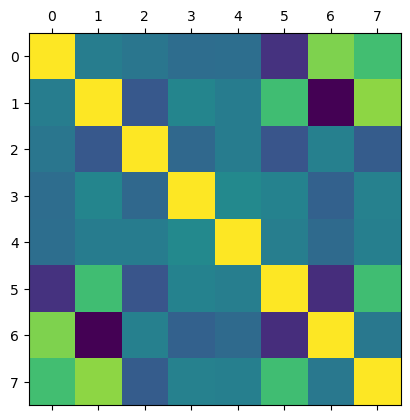

<Figure size 640x480 with 0 Axes>

In [41]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_data.corr())
plt.show()
plt.savefig("correaltion_airbnb_fin.png") #saving the figure

In [42]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\S Keerthana\\Desktop\\Career Foundry\\Achivement 6\\03 Scripts'

## 2 
Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.
For instance, discard “ID,” “date,” and “index” variables.

In [43]:
#create subset

df_sub=df_data[['Price_list','Availability_365','Rating','D.Train','D.Statue_of_liberty','D.airport']]
                        

In [44]:
df_sub=df_sub[df_sub['Price_list'] < 5000]

Text(0.5, 1.0, 'Correlation Matrix')

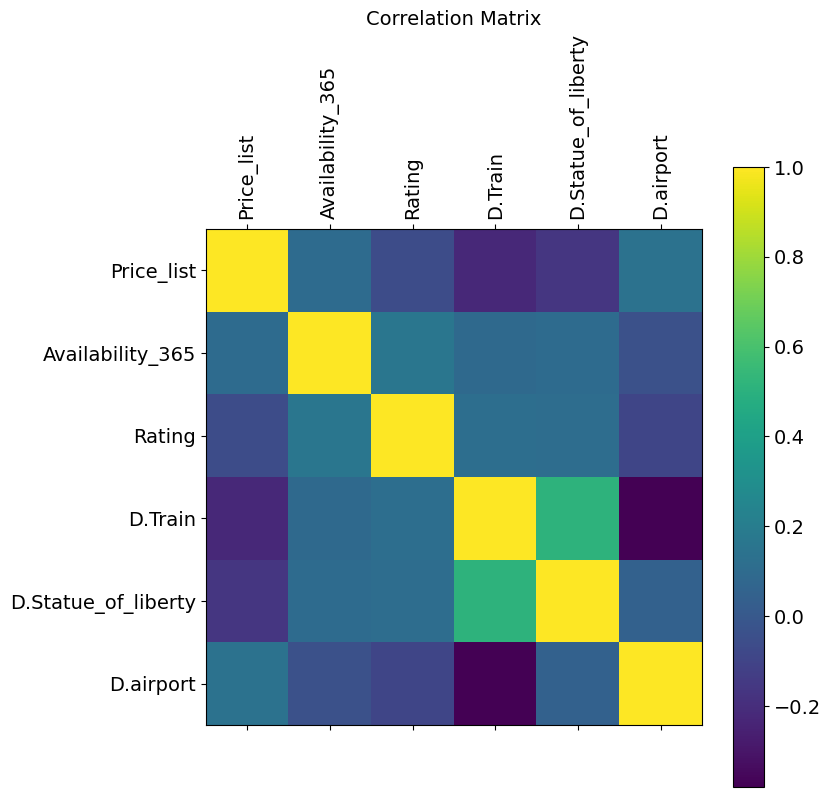

In [45]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

## 3
Create a correlation matrix heatmap (colored).
Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

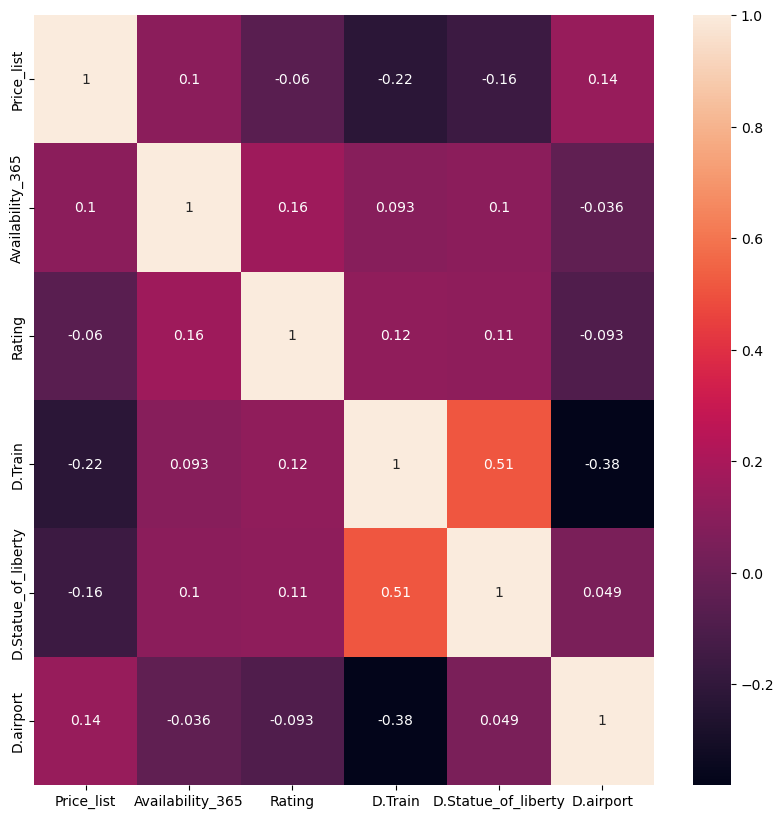

In [46]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_viz = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

## understading gathered
1. The strongest correlation with price is distance to airport and availability. Distance to Statue of Liberty and distance to train station are not so important. As this is just checking linear correlation , we might be able to see how they interact using scatterplots.

## 4
Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
Discuss the output in a markdown cell.

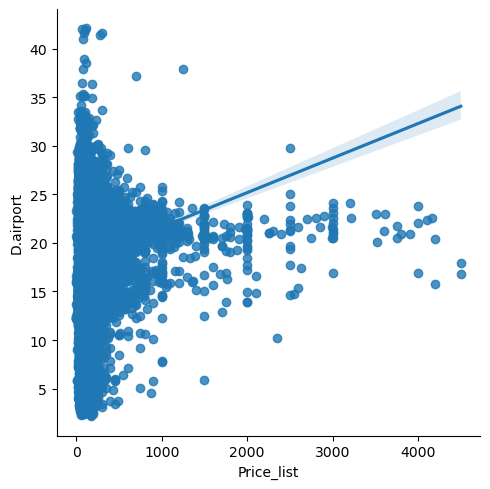

In [50]:
#creating scatter plot price and Number of people

Price_bed_scat=sns.lmplot(x = 'Price_list', y = 'D.airport', data = df_sub)

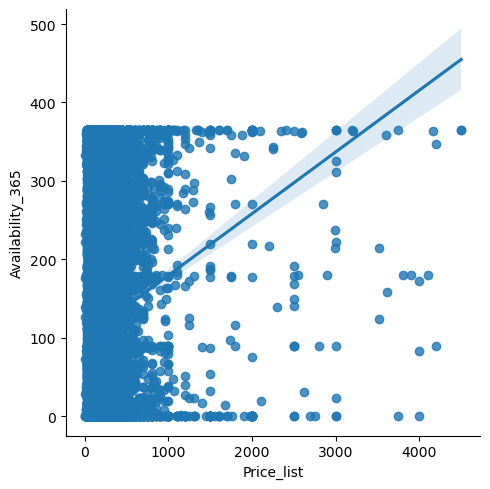

In [51]:
#creating scatter plot price and Number of people

Price_availability_scat=sns.lmplot(x = 'Price_list', y = 'Availability_365', data = df_sub)

## 5
Create a pair plot of the entire data set.
Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

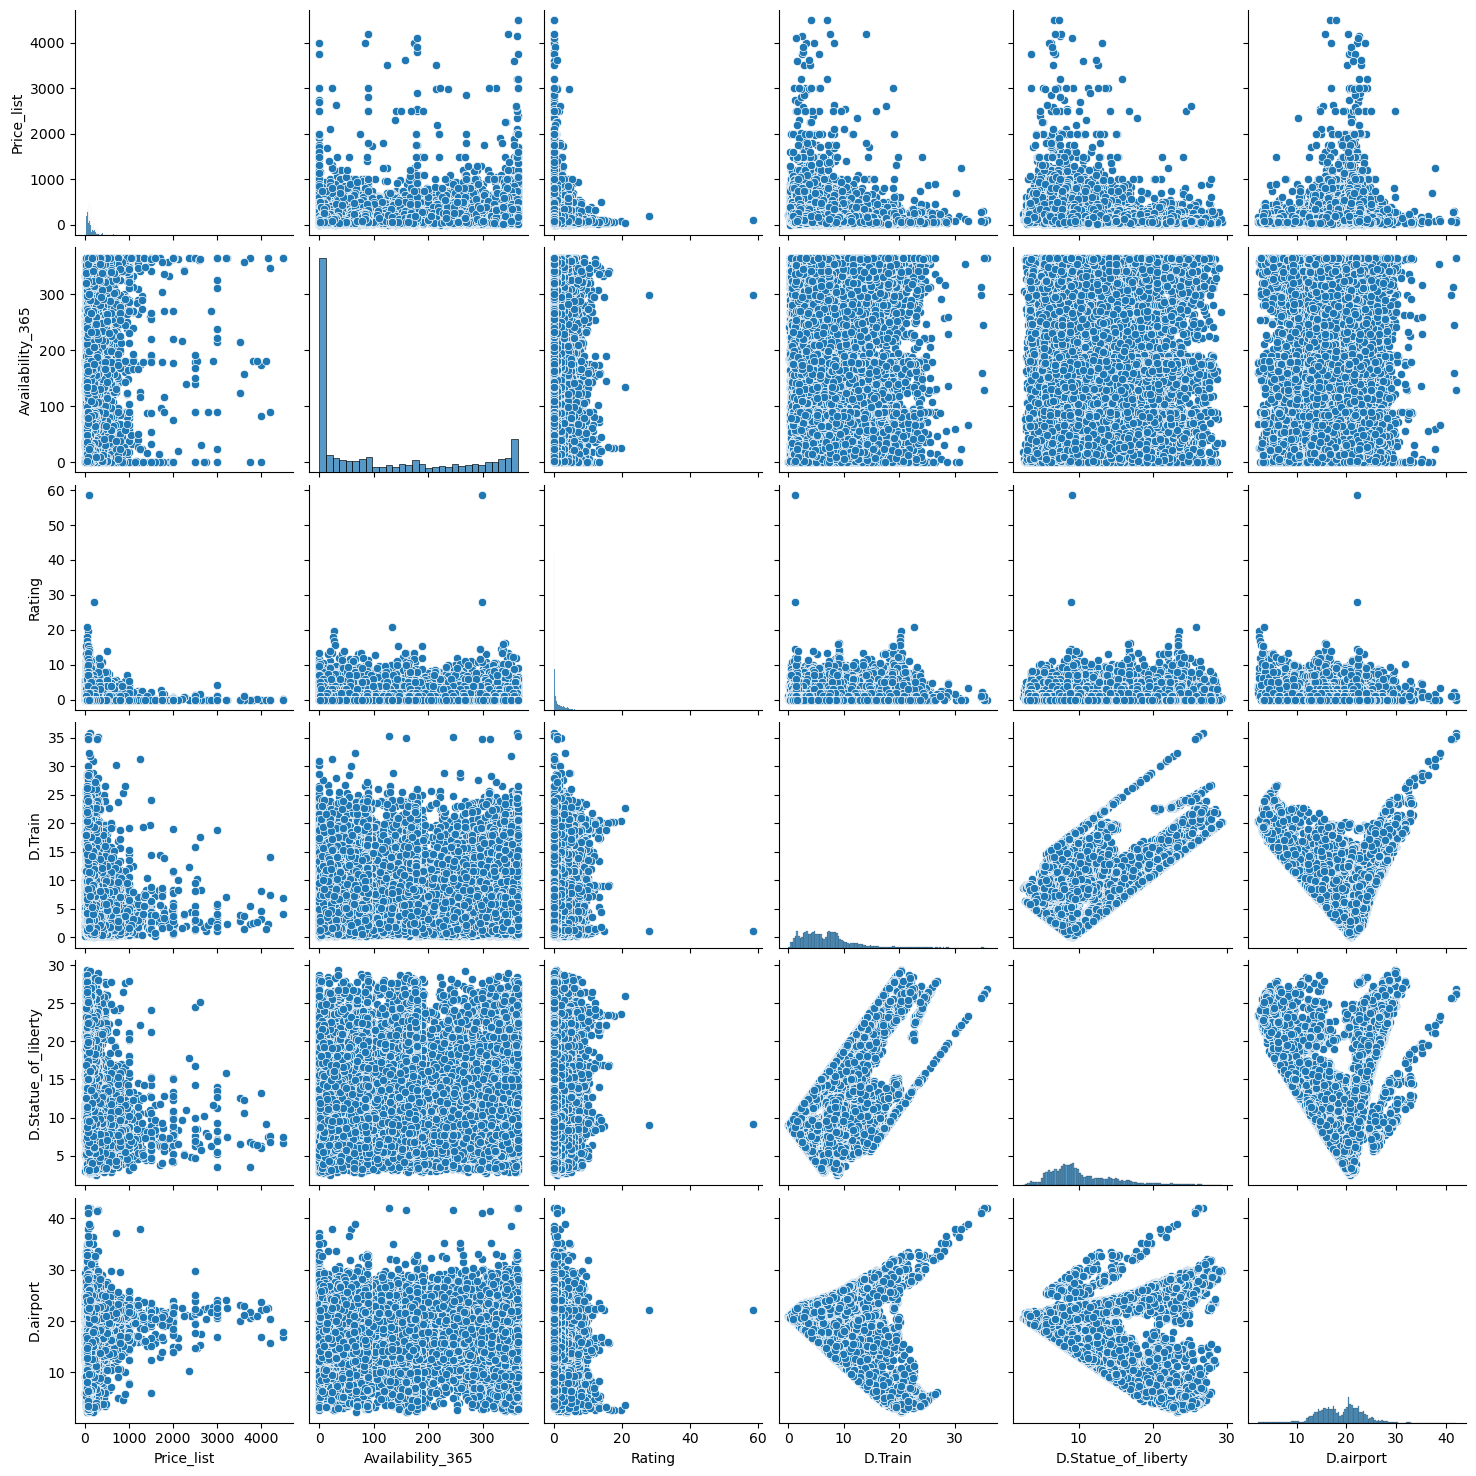

In [52]:
# Create a pair plot 

pair_plot_df_sub = sns.pairplot(df_sub)

## 6
Create a categorical plot and interpret the results.

In [54]:
df_data['Room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

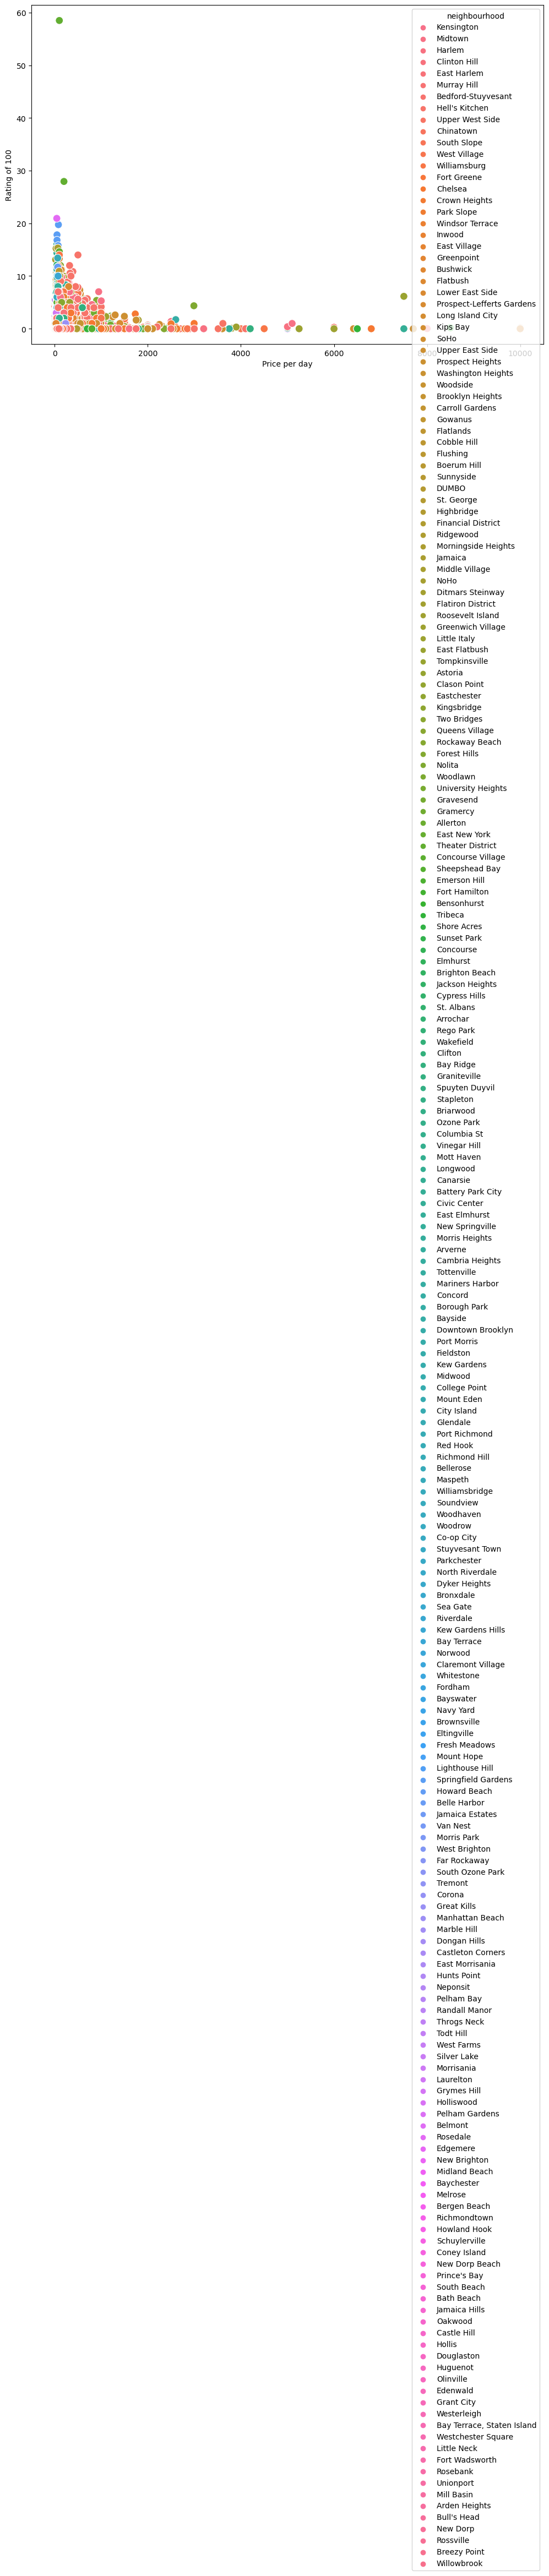

In [55]:
# Plot the clusters for the "price" and "rating" across different neighbourhoods variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_data['Price_list'], y=df_data['Rating'], hue=df_data['neighbourhood'], s=100)

ax.grid(False) 
plt.xlabel('Price per day') 
plt.ylabel('Rating of 100') 
plt.show()

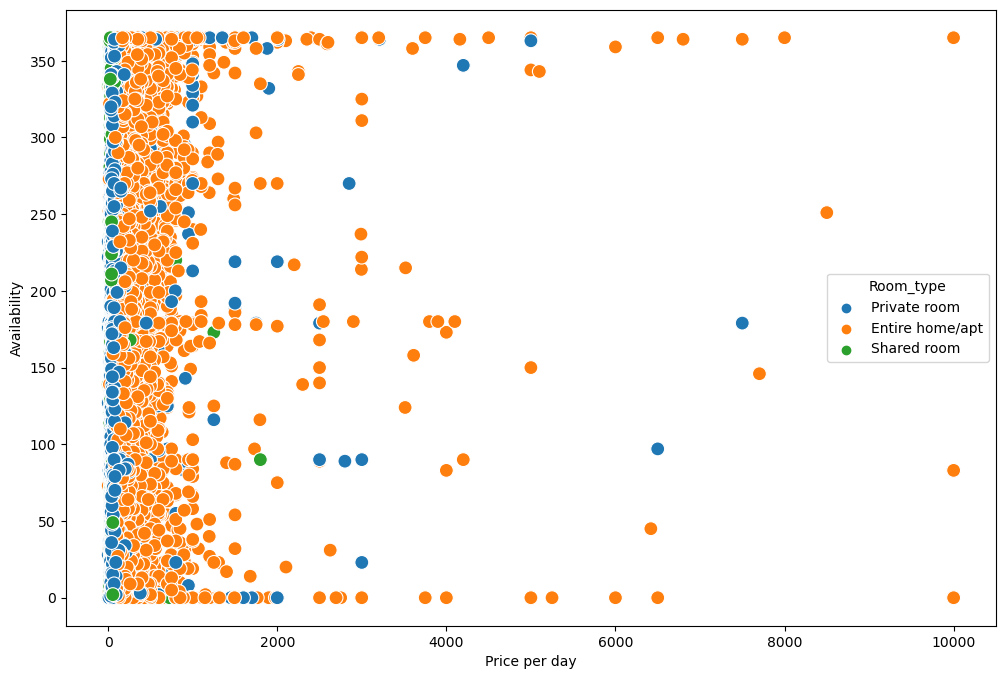

In [56]:
# Plot the clusters for the "price" and "avaialability throughtout year" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_data['Price_list'], y=df_data['Availability_365'], hue=df_data['Room_type'], s=100)

ax.grid(False) 
plt.xlabel('Price per day') 
plt.ylabel('Availability') 
plt.show()

In [57]:
## Exporting the final data 
df_data.to_csv(os.path.join(path,'Prepared Data','newyork_final.csv'),index=False)

## End of task 6.2 and begining of 6.3

In [58]:
#importing geojson file

country_geo=r'C:\Users\S Keerthana\Desktop\Career Foundry\Achivement 6\02 Data\Original Data\neighbourhoods.geojson'

In [59]:
df_data.head()

Listing_id Host_id neighbourhood_group neighbourhood  latitude  longitude  \
0       2539    2787            Brooklyn    Kensington  40.64749  -73.97237   
1       2595    2845           Manhattan       Midtown  40.75362  -73.98377   
2       3647    4632           Manhattan        Harlem  40.80902  -73.94190   
3       3831    4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4       5022    7192           Manhattan   East Harlem  40.79851  -73.94399   

         Room_type  Price_list  Rating  Availability_365  \
0     Private room       149.0    0.21               365   
1  Entire home/apt       225.0    0.38               355   
2     Private room       150.0    0.00               365   
3  Entire home/apt        89.0    4.64               194   
4  Entire home/apt        80.0    0.10                 0   

                location    D.Train  D.airport  D.Statue_of_liberty  
0  (40.64749, -73.97237)  11.699223  16.388641             7.652417  
1  (40.75362, -73.98377)   0.560817  21.443784             8.803805  
2   (40.80902, -73.9419)   6.920867  23.304873            15.879021  
3  (40.68514, -73.95976)   7.654630  16.105092             7.172440  
4  (40.79851, -73.94399)   5.801883  22.483763            14.812923

In [60]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r"C:\Users\S Keerthana\Desktop\Career Foundry\Achivement 6\02 Data\Original Data\neighbourhoods.geojson",)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data["features"]:
    print(i)

{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-73.766708, 40.614911], [-73.768253, 40.614878], [-73.773977, 40.616004], [-73.773631, 40.616327], [-73.768735, 40.620901], [-73.767459, 40.620511], [-73.766978, 40.616919], [-73.766708, 40.614911]]]]}, 'properties': {'neighbourhood': 'Bayswater', 'neighbourhood_group': 'Queens'}}
{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-73.848597, 40.87167], [-73.845823, 40.870239], [-73.854559, 40.859954], [-73.854665, 40.859586], [-73.856389, 40.857594], [-73.868882, 40.857223], [-73.868318, 40.857862], [-73.869554, 40.857784], [-73.871025, 40.85731], [-73.870481, 40.865414], [-73.870555, 40.869703], [-73.867216, 40.86969], [-73.85745, 40.869533], [-73.85555, 40.871813], [-73.853598, 40.873288], [-73.848597, 40.87167]]]]}, 'properties': {'neighbourhood': 'Allerton', 'neighbourhood_group': 'Bronx'}}
{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-73.782822, 40.8

<AxesSubplot: xlabel='Rating', ylabel='Count'>

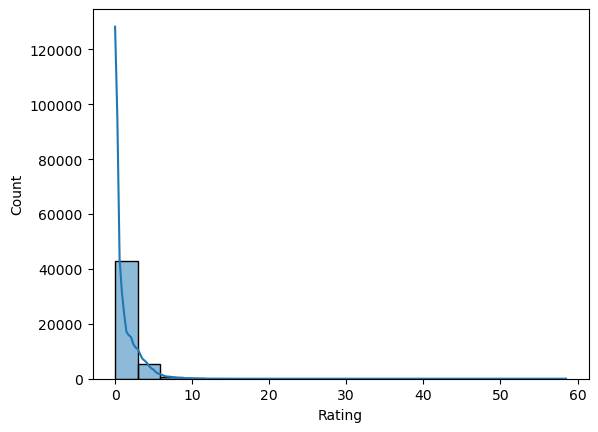

In [61]:
# Check the rating variable

sns.histplot(df_data['Rating'], bins=20, kde = True)

In [62]:
df_data['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

<AxesSubplot: xlabel='Price_list', ylabel='Count'>

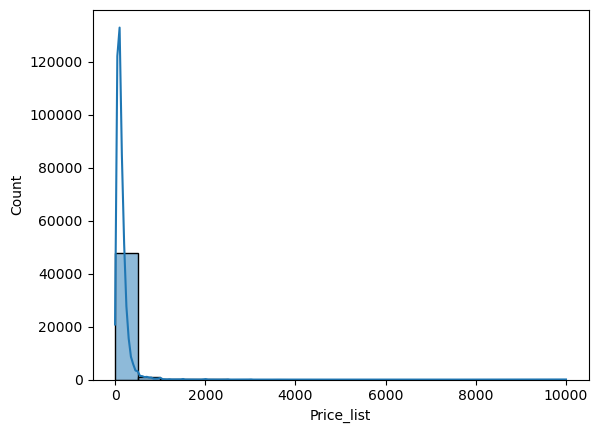

In [63]:
# Check the nieghbourhood variable

sns.histplot(df_data['Price_list'], bins=20, kde = True)

In [65]:
# Setup a folium map at a high-level zoom
map_price = folium.Map(location = [40.712778, -74.006111], zoom_start =12)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
c=folium.Choropleth(
    geo_data = country_geo, 
    data = df_data,
    columns = ["neighbourhood", "Price_list"],
    key_on = "feature.properties.neighbourhood", # this part is very important - check your json file to see where the KEY is located
    fill_color = "RdPu", fill_opacity=0.8, line_opacity=0.3,nan_fill_color="White",labels=['neighbourhood'],
    legend_name = "Price").add_to(map_price),  
    
folium.LayerControl().add_to(map_price)


map_price

In [67]:
map_price.save('plot_data.html')

In [66]:
# Setup a folium map at a high-level zoom
map_rating = folium.Map(location = [40.712778, -74.006111], zoom_start =12)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df_data,
    columns = ["neighbourhood", "Rating"],
    key_on = "feature.properties.neighbourhood", # this part is very important - check your json file to see where the KEY is located
    fill_color = "RdPu", fill_opacity=0.8, line_opacity=0.1,nan_fill_color="White",
    legend_name = "Rating").add_to(map_rating)
folium.LayerControl().add_to(map_rating)

map_rating

In [68]:
map_rating.save('plot_data.html')